# Nigep example using MNIST dataset

In [1]:
! pip install nigep

zsh:1: command not found: pip


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src/nigep/*'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.nigep import Nigep
import keras.layers as layers
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers.legacy import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical


### Load and preprocess MNIST dataset from Keras package

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Converting the pixels data to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
X_train = X_train / 255
X_test = X_test / 255

OUTPUT_DIMS = 10

# One hot encoding the target class (labels)
y_train = to_categorical(y_train, OUTPUT_DIMS)
y_test = to_categorical(y_test, OUTPUT_DIMS)




### Build and compile the MLP model

In [4]:
NUM_EPOCHS = 20

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(OUTPUT_DIMS, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

### Execute Nigep to obtain the Generalization Profile results

In [7]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.001, patience=5, verbose=1)
erl_stopping = EarlyStopping(patience=4, monitor='val_loss', verbose=1)
callbacks = [erl_stopping]


nigep = Nigep(
    execution_name='cifar10',
    x_data=X_train,
    y_data=y_train,
    model=model,
    batch_size=64,
    input_shape=(32,32),
    class_mode='categorical',
    k_fold_n=5,
    target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
    epochs=20,
    callbacks=callbacks
)

nigep.fit()

Epoch 1/20
1125/1125 [==============================] - 42s 37ms/step - loss: 1.2353 - accuracy: 0.5605 - val_loss: 1.0428 - val_accuracy: 0.6385
Epoch 2/20
1125/1125 [==============================] - 42s 38ms/step - loss: 1.0472 - accuracy: 0.6348 - val_loss: 0.8608 - val_accuracy: 0.6948
Epoch 3/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.9409 - accuracy: 0.6697 - val_loss: 0.9717 - val_accuracy: 0.6595
Epoch 4/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.8721 - accuracy: 0.6993 - val_loss: 0.7419 - val_accuracy: 0.7430
Epoch 5/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.8172 - accuracy: 0.7209 - val_loss: 0.7132 - val_accuracy: 0.7590
Epoch 6/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.7655 - accuracy: 0.7366 - val_loss: 0.6716 - val_accuracy: 0.7707
Epoch 7/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.7313 - accuracy: 0.7474 - val_loss: 0.5991 -

/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 12ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 12ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 12ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Epoch 1/20
1125/1125 [==============================] - 43s 38ms/step - loss: 1.0514 - accuracy: 0.6394 - val_loss: 0.8759 - val_accuracy: 0.6867
Epoch 2/20
1125/1125 [==============================] - 44s 39ms/step - loss: 0.8997 - accuracy: 0.6878 - val_loss: 0.7404 - val_accuracy: 0.7425
Epoch 3/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.8493 - accuracy: 0.7072 - val_loss: 0.7587 - val_accuracy: 0.7333
Epoch 4/20
1125/1125 [==============================] - 42s 38ms/step - loss: 0.8224 - accuracy: 0.7147 - val_loss: 0.7258 - val_accuracy: 0.7398
Epoch 5/20
1125/1125 [==============================] - 43s 38ms/step - loss: 0.7898 - accuracy: 0.7242 - val_loss: 0.7929 - val_accuracy: 0.7345
Epoch 6/20
1125/1125 [==============================] - 42s 37ms/step - loss: 0.7600 - accuracy: 0.7362 - val_loss: 0.7169 - val_accuracy: 0.7525
Epoch 7/20
1125/1125 [==============================] - 43s 39ms/step - loss: 0.7448 - accuracy: 0.7446 - val_loss: 0.6611 -

/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 3s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

313/313 [==============================] - 4s 11ms/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Epoch 1/20
1125/1125 [==============================] - 41s 37ms/step - loss: 0.4937 - accuracy: 0.8303 - val_loss: 0.4649 - val_accuracy: 0.8440
Epoch 2/20
1125/1125 [==============================] - 44s 39ms/step - loss: 0.4434 - accuracy: 0.8465 - val_loss: 0.4911 - val_accuracy: 0.8393
Epoch 3/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.4201 - accuracy: 0.8533 - val_loss: 0.4854 - val_accuracy: 0.8425
Epoch 4/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.4257 - accuracy: 0.8543 - val_loss: 0.4394 - val_accuracy: 0.8510
Epoch 5/20
1125/1125 [==============================] - 42s 38ms/step - loss: 0.4140 - accuracy: 0.8557 - val_loss: 0.4721 - val_accuracy: 0.8432
Epoch 6/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.4111 - accuracy: 0.8577 - val_loss: 0.4465 - val_accuracy: 0.8528
Epoch 7/20
1125/1125 [==============================] - 44s 39ms/step - loss: 0.4039 - accuracy: 0.8582 - val_loss: 0.5394 -

/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Epoch 1/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.3907 - accuracy: 0.8659 - val_loss: 0.4539 - val_accuracy: 0.8547
Epoch 2/20
1125/1125 [==============================] - 44s 39ms/step - loss: 0.3551 - accuracy: 0.8769 - val_loss: 0.4517 - val_accuracy: 0.8525
Epoch 3/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.3442 - accuracy: 0.8817 - val_loss: 0.4562 - val_accuracy: 0.8510
Epoch 4/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.3353 - accuracy: 0.8857 - val_loss: 0.4371 - val_accuracy: 0.8637
Epoch 5/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.3379 - accuracy: 0.8817 - val_loss: 0.4323 - val_accuracy: 0.8610
Epoch 6/20
1125/1125 [==============================] - 45s 40ms/step - loss: 0.3330 - accuracy: 0.8846 - val_loss: 0.4591 - val_accuracy: 0.8555
Epoch 7/20
1125/1125 [==============================] - 44s 40ms/step - loss: 0.3318 - accuracy: 0.8853 - val_loss: 0.4944 -

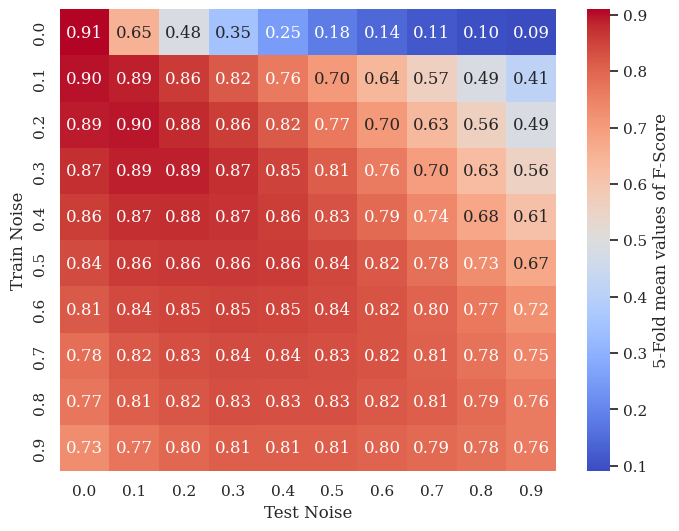

In [8]:
nigep.plot_and_save_generalization_profile()